### wandb quickstart

In [1]:
import wandb
import random

wandb.login(key='46c3b8e339b3fb22dc286204510c8af5b2c3e2e5')

# start a new wandb run to track this script
wandb.init(
    # set the wandb project where this run will be logged
    project="test_still_work_in_russia",

    # track hyperparameters and run metadata
    config={
    "learning_rate": 0.02,
    "architecture": "CNN",
    "dataset": "CIFAR-100",
    "epochs": 10,
    }
)

# simulate training
epochs = 10
offset = random.random() / 5
for epoch in range(2, epochs):
    acc = 1 - 2 ** -epoch - random.random() / epoch - offset
    loss = 2 ** -epoch + random.random() / epoch + offset

    # log metrics to wandb
    wandb.log({"acc": acc, "loss": loss})

# [optional] finish the wandb run, necessary in notebooks
wandb.finish()

wandb: Using wandb-core as the SDK backend. Please refer to https://wandb.me/wandb-core for more information.
wandb: W&B API key is configured. Use `wandb login --relogin` to force relogin
wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /Users/bspanfilov/.netrc
wandb: Currently logged in as: bspanfilov (tmboris). Use `wandb login --relogin` to force relogin


acc,▁▃▇▆▆█▇█
loss,█▄▆▂▁▃▁▁
acc,0.88354
loss,0.11338


### shape reaserch

In [2]:
import pickle

with open('/Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/src/data.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

In [3]:
type(loaded_data)

list

In [5]:
loaded_data[0]

{'audio': tensor([[0.0006, 0.0002, 0.0002,  ..., 0.0004, 0.0005, 0.0006]]),
 'spectrogram': tensor([[[0.0000e+00, 0.0000e+00, 0.0000e+00,  ..., 0.0000e+00,
           0.0000e+00, 0.0000e+00],
          [3.1197e-04, 1.1608e-03, 1.2813e-03,  ..., 2.6680e-04,
           1.4664e-03, 9.7162e-04],
          [1.6797e-03, 6.2502e-03, 6.8988e-03,  ..., 1.4365e-03,
           7.8957e-03, 5.2315e-03],
          ...,
          [3.9049e-06, 2.1788e-05, 4.9069e-06,  ..., 9.1084e-06,
           6.2222e-06, 7.5193e-06],
          [7.5832e-06, 1.1364e-05, 7.0826e-06,  ..., 3.4638e-06,
           6.5170e-06, 8.8364e-06],
          [9.0198e-07, 5.7118e-06, 1.2817e-05,  ..., 6.4256e-06,
           2.8519e-06, 4.0951e-06]]]),
 'text': "hugh's written a delightful part for her and she's quite inexpressible",
 'text_encoded': tensor([[ 8., 21.,  7.,  8., 19., 27., 23., 18.,  9., 20., 20.,  5., 14., 27.,
           1., 27.,  4.,  5., 12.,  9.,  7.,  8., 20.,  6., 21., 12., 27., 16.,
           1., 18., 20., 2

In [6]:
len(loaded_data)

2

In [9]:
len(loaded_data[0]['text_encoded'][0])

68

In [48]:
loaded_data[1]['text_encoded'].squeeze(0).shape


torch.Size([172])

In [46]:
texts = [loaded_data[i]['text_encoded'][0] for i in range(len(loaded_data))]

In [12]:
len(texts)

2

In [13]:
from torch.nn.utils.rnn import pad_sequence

padded = pad_sequence(texts)

In [19]:
type(padded)

torch.Tensor

In [20]:
padded.shape

torch.Size([172, 2])

In [22]:
loaded_data[0]['spectrogram'].shape

torch.Size([1, 128, 319])

In [52]:
loaded_data[1]['spectrogram'].squeeze(0).permute(1, 0).shape

torch.Size([1165, 128])

In [54]:
import torch

pad_sequence([sample['spectrogram'].squeeze(0).permute(1, 0) for sample in loaded_data], batch_first=True).permute(0, 2, 1).shape


torch.Size([2, 128, 1165])

In [56]:
import math

In [58]:
rnn_input_size = 128
rnn_input_size = int(math.floor(rnn_input_size + 2 * 20 - 41) / 2 + 1)
rnn_input_size = int(math.floor(rnn_input_size + 2 * 10 - 21) / 2 + 1)
rnn_input_size *= 32
rnn_input_size

1024

$$
\text{HardTanh}(x) = \begin{cases}
            \text{max\_val} & \text{ if } x > \text{ max\_val } \\
            \text{min\_val} & \text{ if } x < \text{ min\_val } \\
            x & \text{ otherwise } \\
        \end{cases}
        $$

### cer-wer debug

In [4]:
import editdistance
def calc_cer(target_text, predicted_text) -> float:
    if len(target_text) == 0:
        return 1
    return editdistance.eval(target_text.split(), predicted_text.split()) / len(target_text.split())


def calc_wer(target_text, predicted_text) -> float:
    if len(target_text) == 0:
        return 1
    return editdistance.eval(target_text, predicted_text) / len(target_text)


In [5]:
target_text = 'a a a'
predicted_text = 'a b a'

In [6]:
calc_cer(
    target_text=target_text,
    predicted_text=predicted_text
)

0.3333333333333333

In [7]:
calc_wer(
    target_text=target_text,
    predicted_text=predicted_text
)

0.2

### binarizing lm

In [1]:
!git clone https://github.com/kpu/kenlm.git

Cloning into 'kenlm'...
remote: Enumerating objects: 14170, done.
remote: Counting objects: 100% (483/483), done.
remote: Compressing objects: 100% (337/337), done.
remote: Total 14170 (delta 167), reused 410 (delta 132), pack-reused 13687 (from 1)
Receiving objects: 100% (14170/14170), 5.91 MiB | 2.69 MiB/s, done.
Resolving deltas: 100% (8047/8047), done.


In [4]:
%cd kenlm/

/Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/src/kenlm


In [5]:
!mkdir -p build
%cd build

/Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/src/kenlm/build


In [13]:
!cmake -DCMAKE_CXX_STANDARD=14 ..
!make -j4

CMake Deprecation Warning at CMakeLists.txt:1 (cmake_minimum_required):
  Compatibility with CMake < 3.5 will be removed from a future version of
  CMake.

  Update the VERSION argument <min> value or use a ...<max> suffix to tell
  CMake that the project does not need compatibility with older versions.


-- Could NOT find Eigen3 (missing: Eigen3_DIR)
CMake Warning (dev) at CMakeLists.txt:97 (find_package):
  Policy CMP0167 is not set: The FindBoost module is removed.  Run "cmake
  --help-policy CMP0167" for policy details.  Use the cmake_policy command to
  set the policy and suppress this warning.

This warning is for project developers.  Use -Wno-dev to suppress it.

-- Configuring done (0.1s)
-- Generating done (0.2s)
-- Build files have been written to: /Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/src/kenlm/build
[  1%] Building CXX object util/CMakeFiles/kenlm_util.dir/double-conversion/bignum-dtoa.cc.o
[  3%] Building CXX object util/CMakeFiles/ken

In [14]:
!bin/build_binary /Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/3-gram.pruned.1e-7.arpa /Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/3-gram.pruned.1e-7.bin

Reading /Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/3-gram.pruned.1e-7.arpa
----5---10---15---20---25---30---35---40---45---50---55---60---65---70---75---80---85---90---95--100
****************************************************************************************************
SUCCESS


### Beam search

In [2]:
'^'.upper()

'^'

In [4]:
class a:
    def __init__(self, b):
        self.b = b
    def __call__(self):
        raise NotImplementedError()

class A(a):
    def __call__(self):
        self.b += 1

In [6]:
t = a(5)

In [7]:
t()

NotImplementedError: 

In [76]:
import re
from string import ascii_lowercase
from pyctcdecode import build_ctcdecoder
import multiprocessing
from collections import defaultdict

import torch

# TODO add CTC decode
# TODO add BPE, LM, Beam Search support
# Note: think about metrics and encoder
# The design can be remarkably improved
# to calculate stuff more efficiently and prettier


class CTCTextEncoder:
    EMPTY_TOK = ""

    def __init__(self, lm_path, vocab_path, beam_size, alphabet=None, **kwargs):
        """
        Args:
            alphabet (list): alphabet for language. If None, it will be
                set to ascii
        """

        if alphabet is None:
            alphabet = list(ascii_lowercase + " ")

        self.alphabet = alphabet
        self.vocab = [self.EMPTY_TOK] + list(self.alphabet)

        self.ind2char = dict(enumerate(self.vocab))
        self.char2ind = {v: k for k, v in self.ind2char.items()}

        self.beam_size = beam_size

        if lm_path is not None:
            assert vocab_path is not None, "vocab_path is None"
            with open(vocab_path, 'r') as file:
                unigrams = [x.strip() for x in file.readlines()]
            # big letters, because have big letters in unigrams
            self.decoder = build_ctcdecoder([""] + [w.upper() for w in self.alphabet], kenlm_model_path=lm_path, unigrams=unigrams)

    def __len__(self):
        return len(self.vocab)

    def __getitem__(self, item: int):
        assert type(item) is int
        return self.ind2char[item]

    def encode(self, text) -> torch.Tensor:
        text = self.normalize_text(text)
        try:
            return torch.Tensor([self.char2ind[char] for char in text]).unsqueeze(0)
        except KeyError:
            unknown_chars = set([char for char in text if char not in self.char2ind])
            raise Exception(
                f"Can't encode text '{text}'. Unknown chars: '{' '.join(unknown_chars)}'"
            )

    def decode(self, inds) -> str:
        """
        Raw decoding without CTC.
        Used to validate the CTC decoding implementation.

        Args:
            inds (list): list of tokens.
        Returns:
            raw_text (str): raw text with empty tokens and repetitions.
        """
        return "".join([self.ind2char[int(ind)] for ind in inds]).strip()

    def _ctc_decode(self, inds) -> str:
        result_string = ''
        last_is_empty = False
        for ind in inds:
            char = self.ind2char[ind]

            if char == self.EMPTY_TOK:
                last_is_empty = True
                continue

            if len(result_string) == 0 or \
                (len(result_string) > 0 and (char != result_string[-1] or last_is_empty)):
                result_string += char

            last_is_empty = False

        return result_string
    
    def _expand_and_merge_path(self, dp, next_token_probs):
        new_dp = defaultdict(float)
        for ind, next_token_prob in enumerate(next_token_probs):
            cur_char = self.ind2char[ind]
            for (prefix, last_char), v in dp.items():
                if last_char == cur_char:
                    new_prefix = prefix
                else:
                    if cur_char != self.EMPTY_TOK:
                        new_prefix = prefix + cur_char
                    else:
                        new_prefix = prefix
                new_dp[(new_prefix, cur_char)] += v * next_token_prob
        return new_dp

    def _truncate_paths(self, dp):
        return dict(sorted(list(dp.items()), key=lambda x: -x[1])[:self.beam_size])

    def ctc_beam_search(self, probs, **other):
        dp = {
            ('', self.EMPTY_TOK): 1.0,
        }
        for prob in torch.exp(probs):
            dp = self._expand_and_merge_path(dp, prob)
            dp = self._truncate_paths(dp)
            print(dp)
        # хотим объединить вероятности одинаковых префиксов
        final_probs = defaultdict(float)
        max_prob = -1e10
        best_prefics = ''
        for (prefix, _), proba in dp.items():
            print(prefix)
            final_probs[prefix] += proba
            if final_probs[prefix] > max_prob:
                max_prob = final_probs[prefix]
                best_prefics = prefix

        return best_prefics
    
    def argmax_ctc_decode(self, probs, **other):
        """
        :param: probs - верояности уже обрезанные по длине. shape = [length, vocab_size]
        """
        return self._ctc_decode(torch.argmax(probs.cpu(), dim=-1).numpy())

    def lib_lm_beam_search(self, probs, probs_lengths, **other):
        """
        :param: probs - батч предсказаний. shape = [bs, length, vocab_size]
        """
        if len(probs.shape) == 2:
            probs = probs.unsqueeze(0) # because don't have batch on inference

        probs = [probs[i, :probs_lengths[i], :].numpy() for i in range(probs_lengths.shape[0])]

        with multiprocessing.get_context("fork").Pool() as pool:
            texts = self.decoder.decode_batch(pool, probs, beam_width=self.beam_size)
        return [w.lower().strip() for w in texts]

    @staticmethod
    def normalize_text(text: str):
        text = text.lower()
        text = re.sub(r"[^a-z ]", "", text)
        return text


In [77]:
import pickle

text_encoder = CTCTextEncoder(None, None, 2)


# Загрузка объекта из файла
with open('/Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/data.pkl', 'rb') as file:  # 'rb' - чтение в бинарном режиме
    loaded_data = pickle.load(file)

In [84]:
torch.exp(loaded_data[0])

tensor([1.0000e+00, 1.4547e-07, 5.5461e-07, 1.3096e-07, 8.4918e-08, 2.5559e-07,
        7.6220e-08, 1.1464e-08, 1.8515e-07, 5.1672e-08, 2.0537e-08, 9.7999e-08,
        1.3130e-06, 7.5126e-07, 5.9141e-08, 2.0196e-07, 1.5366e-08, 4.8208e-08,
        3.2818e-07, 6.3157e-08, 7.4432e-09, 2.2656e-08, 2.3567e-08, 9.2250e-08,
        2.9248e-08, 8.3351e-08, 1.2896e-08, 5.1670e-08])

In [79]:
text_encoder.argmax_ctc_decode(loaded_data)

'only for iminute or so'

In [80]:
torch.argmax(loaded_data, dim=-1)

tensor([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 15,  0,
         0,  0,  0,  0, 14, 14, 14,  0,  0, 12, 12, 12, 25,  0,  0,  0, 27, 27,
         6,  6, 15,  0, 18, 18, 27, 27,  0,  9,  0,  0,  0, 13, 13,  0,  9, 14,
        14,  0,  0, 21, 21, 20,  5, 27, 27, 15, 18, 18, 18,  0,  0, 27, 27, 19,
        19,  0,  0, 15,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
         0,  0,  0,  0,  0,  0,  0,  0,  0,  0])

In [81]:
import numpy as np
print(torch.sum(loaded_data[0]))
np.argmax(loaded_data[0])

tensor(-442.9743)


tensor(0)

In [82]:
text_encoder.ctc_beam_search(loaded_data)

{('', ''): tensor(1.0000), ('l', 'l'): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('l', ''): tensor(1.3130e-06)}
{('', ''): tensor(1.0000), ('a', 'a'): tensor(1.5573e-06)}
{('', ''): tensor(1.0000), ('a', 'a'): tensor(3.1874e-06)}
{('', ''): tensor(1.0000), ('a', 'a'): tensor(4.2664e-06)}
{('', ''): tensor(0.9999), ('m', 'm'): tensor(7.4851e-06)}
{('', ''): tensor(0.9993), ('l', 'l'): tensor(0.0002)}
{('', ''): tensor(0.9973), ('p', 'p'): tensor(0.0008)}
{('', ''): tensor(0.9970), ('p', ''): tensor(0.0008)}
{('o', 'o'): tensor(0.9970), ('po', 'o'): tensor(0.0008)}
{('o', ''): tensor(

'only for iminute or so'

### augs

In [85]:
from torch import nn
import torchaudio

specaug = nn.Sequential(
    torchaudio.transforms.FrequencyMasking(20),
    torchaudio.transforms.TimeMasking(100),
)

In [91]:
a = torch.randn((5, 128, 666))

In [92]:
a.shape

torch.Size([5, 128, 666])

In [93]:
specaug(a)

tensor([[[-0.3374, -0.1522, -0.4651,  ..., -0.3773, -1.1293, -0.4618],
         [-1.0227, -1.4239,  1.1191,  ...,  0.6396,  0.4483, -1.1138],
         [ 0.4114,  0.2477,  0.9890,  ...,  1.6935,  0.4736, -1.3390],
         ...,
         [ 1.1251, -0.0357,  0.1555,  ...,  0.1824,  1.3368, -1.5364],
         [ 2.2206,  1.2933,  1.9437,  ...,  0.3278,  1.0901, -1.1207],
         [-1.3229,  1.8384, -1.7209,  ..., -1.5996, -1.0540, -0.6843]],

        [[ 0.2072,  0.3080,  0.1338,  ...,  0.2828,  2.4828, -1.3197],
         [ 0.3007,  0.9781, -0.3485,  ..., -0.2801,  1.2075, -0.2292],
         [-0.6800, -2.0432,  0.0645,  ...,  0.1085,  0.5434, -0.8372],
         ...,
         [ 1.5237,  0.4504,  0.9204,  ...,  0.7422,  1.4189, -0.0660],
         [ 0.7296, -0.6279, -0.8128,  ...,  0.1771, -0.6623, -0.2698],
         [-0.2622, -1.8572, -0.7172,  ...,  0.3188, -1.4542,  0.8434]],

        [[-1.3404,  0.8355,  0.2850,  ...,  0.6836,  0.1228,  1.1082],
         [-0.4133, -1.2361, -1.8654,  ...,  1

### bpe


In [123]:
import os
dir_PATH = '/Users/bspanfilov/Documents/edu/hse-4/Звук/hw1_asr/pytorch_project_template/data/datasets/librispeech/utf-8'
texts = []


# Проходим по всем файлам в распакованной директории
for root1, dirs, _ in os.walk(dir_PATH):
    for dir_ in dirs:
        for root2, _, files in os.walk(os.path.join(root1, dir_)):
            for file in files:
                file_path = os.path.join(root2, file)
                # Только текстовые файлы
                with open(file_path, 'r', encoding="utf-8") as f:
                    try:
                        text = f.read().strip().lower()  # Приводим к нижнему регистру (может быть полезным)
                        texts.append(text)
                    except Exception as e:
                        print(f"Ошибка чтения файла {file}: {e}")
                    
print(f"Собрано {len(texts)} текстов для обучения токенизатора.")

Собрано 41 текстов для обучения токенизатора.


In [124]:
def normalize_text(text: str):
        text = text.lower()
        text = re.sub(r"[^a-z ]", "", text)
        return text

In [125]:
from tokenizers import Tokenizer, models, pre_tokenizers, processors, trainers
from tokenizers.pre_tokenizers import Whitespace
from tokenizers.trainers import BpeTrainer
from tokenizers.models import BPE

# 1. Создаём пустой BPE токенизатор
tokenizer = Tokenizer(BPE())

# 2. Используем пробел как метод разбиения на слова
tokenizer.pre_tokenizer = Whitespace()

# 3. Создаём обучающий тренер для BPE
trainer = BpeTrainer(special_tokens=[" "], vocab_size=200)

# 4. Соберём примеры предложений для обучения токенизатора
texts = [normalize_text(text) for text in texts]

# 5. Обучаем BPE токенизатор
tokenizer.train_from_iterator(texts, trainer)

# 6. Сохраняем токенизатор на диск (по желанию)
tokenizer.save("bpe_tokenizer.json")
tokenizer.get_vocab()

{'ight': 196,
 'f': 6,
 'co': 164,
 'no': 59,
 'au': 184,
 'e': 5,
 'se': 51,
 'ay': 73,
 't': 20,
 'end': 177,
 'have': 146,
 'ere': 100,
 'bo': 189,
 'd': 4,
 'wi': 61,
 'she': 159,
 'ne': 110,
 'fe': 125,
 'all': 84,
 'ad': 57,
 'ill': 191,
 'h': 8,
 'ld': 69,
 'ha': 90,
 'for': 66,
 'fr': 126,
 'im': 85,
 'gre': 183,
 'fo': 156,
 'with': 80,
 'tion': 163,
 'ro': 70,
 'mo': 98,
 'll': 65,
 'ant': 160,
 'an': 30,
 'or': 42,
 'al': 47,
 'was': 76,
 'od': 151,
 'there': 167,
 'te': 179,
 'ge': 197,
 'when': 187,
 'is': 41,
 'th': 27,
 'wh': 50,
 'li': 75,
 'thing': 199,
 'of': 37,
 'k': 11,
 'ter': 89,
 'ght': 99,
 'ent': 67,
 'him': 153,
 'ur': 113,
 'us': 106,
 'pl': 165,
 'ard': 166,
 'pr': 181,
 'dis': 194,
 'do': 168,
 'er': 31,
 'ce': 62,
 'tr': 138,
 'which': 119,
 'up': 140,
 'at': 34,
 'st': 53,
 'our': 124,
 're': 32,
 'me': 68,
 'sh': 120,
 'con': 108,
 'from': 150,
 'et': 152,
 'wor': 161,
 'w': 23,
 'j': 10,
 'ac': 86,
 'com': 128,
 'ust': 178,
 'am': 114,
 'x': 24,
 'ould

In [126]:
'dsfvs'.upper()

'DSFVS'

In [127]:
''.upper()

''

### plot test-other distribution

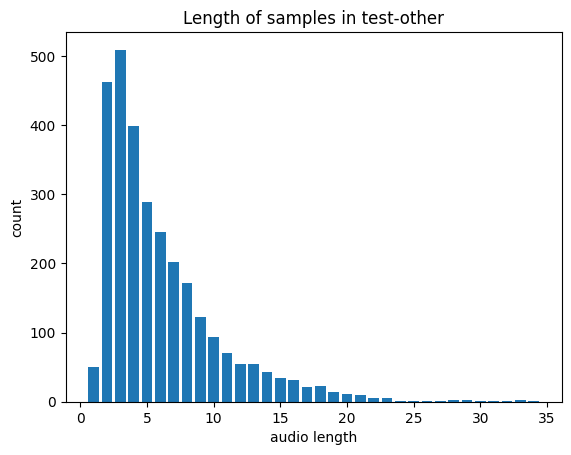

In [136]:
a = {1: 50, 2: 462, 3: 509, 4: 398, 5: 289, 6: 245, 7: 202, 8: 172, 9: 123, 10: 94, 11: 70, 12: 55, 13: 55, 14: 43, 15: 35, 16: 32, 17: 22, 18: 23, 19: 14, 20: 11, 21: 9, 22: 6, 23: 5, 24: 1, 25: 1, 26: 1, 27: 1, 28: 2, 29: 2, 30: 1, 31: 1, 32: 1, 33: 3, 34: 1}

import matplotlib.pyplot as plt

plt.bar(a.keys(), a.values())
plt.xlabel('audio length')
plt.ylabel('count')
plt.title('Length of samples in test-other')

plt.show()